In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use('seaborn-darkgrid')

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('tesla-stock-price.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [3]:
# preprocessing
df.index = pd.to_datetime(df['Date'])      
# changes the date column as index columns
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2020-01-28,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


In [4]:
df = df.drop(['Date'], axis='columns')
# drop The original date column
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


In [5]:
# explanatory variables
# predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# store all predictor variables in X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2010-06-29,-4.889999,7.459999
2010-06-30,1.960001,7.120001
2010-07-01,3.040001,5.650000
2010-07-02,3.799999,4.390001
2010-07-06,3.889999,4.170000


In [6]:
# target variable
# tomorrow's price is greater than today's price, then buy the stock
# 1 -> buy and 0 -> no position
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 0, 0, ..., 1, 1, 0])

In [7]:
# train/test split
split_percentage = 0.8
split = int(split_percentage*len(df))

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

In [8]:
# Support Vector Classifier (SVC)
cls = SVC().fit(X_train, y_train)

In [15]:
df['Predicted_Signal'] = cls.predict(X)

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,-4.889999,7.459999,0,NaN,NaN,NaN,NaN
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,1.960001,7.120001,1,-0.002511,-0.000000,-0.002511,0.000000
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,3.040001,5.650000,1,-0.078473,-0.078473,-0.080984,-0.078473
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,3.799999,4.390001,1,-0.125683,-0.125683,-0.206667,-0.204156
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,3.889999,4.170000,1,-0.160937,-0.160937,-0.367604,-0.365093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,1.589966,18.729981,1,0.015913,0.015913,4.428795,4.503221
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,-5.299988,22.369995,0,0.024854,0.024854,4.453649,4.528075
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,-8.390015,32.880005,1,0.102962,0.000000,4.556611,4.528075


In [17]:
accuracy= accuracy_score(cls.predict(X_test), y_test)
accuracy

0.493801652892562

In [10]:
df['Return'] = df.Close.pct_change()        # daily returns

In [11]:
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)     # strategy returns

In [12]:
df['Cum_Ret'] = df['Return'].cumsum()       # cumulative returns
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,-4.889999,7.459999,0,NaN,NaN,NaN
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,1.960001,7.120001,1,-0.002511,-0.000000,-0.002511
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,3.040001,5.650000,1,-0.078473,-0.078473,-0.080984
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,3.799999,4.390001,1,-0.125683,-0.125683,-0.206667
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,3.889999,4.170000,1,-0.160937,-0.160937,-0.367604
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,1.589966,18.729981,1,0.015913,0.015913,4.428795
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,-5.299988,22.369995,0,0.024854,0.024854,4.453649
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,-8.390015,32.880005,1,0.102962,0.000000,4.556611


In [13]:
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()     # ctrategy cumulative returns
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,-4.889999,7.459999,0,NaN,NaN,NaN,NaN
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,1.960001,7.120001,1,-0.002511,-0.000000,-0.002511,0.000000
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,3.040001,5.650000,1,-0.078473,-0.078473,-0.080984,-0.078473
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,3.799999,4.390001,1,-0.125683,-0.125683,-0.206667,-0.204156
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,3.889999,4.170000,1,-0.160937,-0.160937,-0.367604,-0.365093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,1.589966,18.729981,1,0.015913,0.015913,4.428795,4.503221
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,-5.299988,22.369995,0,0.024854,0.024854,4.453649,4.528075
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,-8.390015,32.880005,1,0.102962,0.000000,4.556611,4.528075


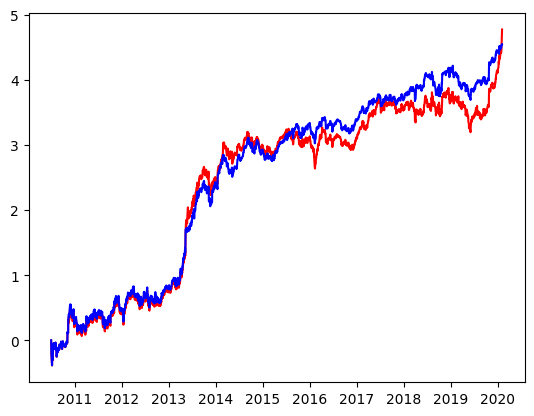

In [14]:
# plotting
import matplotlib.pyplot as plt
%matplotlib inline
  
plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')